<div align = 'center'>

## Introduction

</div>

Classification examples using Deep Learning from François Chollet - Deep Learning With Python [book](https://www.amazon.com.br/Deep-Learning-Python-Francois-Chollet/dp/1617294438/ref=asc_df_1617294438/?tag=googleshopp00-20&linkCode=df0&hvadid=379735814613&hvpos=&hvnetw=g&hvrand=12016580876863644968&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=1001773&hvtargid=pla-356949152624&psc=1).

Two classification tasks are assigned here:

- Single-label binary classification - One output classification between positive or negative on movies reviews from imdb dataset.

- Single-label multiclass classification - One output classification between 46 classes from Reuters newswire dataset.

In [1]:
# Suppressing warnings outputs
import warnings
warnings.filterwarnings('ignore')

<div align='center'>

## Single-label binary classification

</div>

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The argument `num_words=10000` means you’ll only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. This allows you to work with vector data of manageable size.

In [3]:
train_data.shape #1D-array

(25000,)

In [4]:
train_labels.shape # 1D-array

(25000,)

In [5]:
train_data[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

`train_data` and `test_data` are lists of reviews; each review is a list of word indices (encoding a sequence of words). 

In [6]:
train_labels[:2]

array([1, 0])

`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

#### Encoding the integer sequence into a binary matrix

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions)) # Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) # Vectorized training data
x_test = vectorize_sequences(test_data) # Vectorized test data

In [8]:
x_train.shape

(25000, 10000)

In [9]:
x_test.shape

(25000, 10000)

In [10]:
print("Head of x_train: {}; \n Head of x_test: {}".format(x_train[:5], x_test[:5]))

Head of x_train: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]; 
 Head of x_test: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


#### Vectorizing labels

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
print('first 2-values of y_train {}; fist 2-values of y_test {}'.format(y_train[:2], y_test[:2]))

first 2-values of y_train [1. 0.]; fist 2-values of y_test [0. 1.]


#### Building network

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
			  loss ='binary_crossentropy',
			  metrics = ['accuracy']) 

In [14]:
x_valid = x_train[:10000] # set for validation
y_valid = y_train[:10000] # labels for validation

partial_x_train = x_train[10000:] # set for training
partial_y_train = y_train[10000:] # label for training

In [15]:
history = model.fit(partial_x_train,
					partial_y_train,
					epochs = 20,
					batch_size = 512,
					validation_data = (x_valid, y_valid))

Epoch 1/20
30/30 [==============================] - 3s 53ms/step - loss: 0.5397 - accuracy: 0.7757 - val_loss: 0.4214 - val_accuracy: 0.8602
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3328 - accuracy: 0.9010 - val_loss: 0.3473 - val_accuracy: 0.8657
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2423 - accuracy: 0.9250 - val_loss: 0.3003 - val_accuracy: 0.8824
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1916 - accuracy: 0.9398 - val_loss: 0.2809 - val_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1577 - accuracy: 0.9511 - val_loss: 0.2916 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1279 - accuracy: 0.9615 - val_loss: 0.2849 - val_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1062 - accuracy: 0.9709 - val_loss: 0.3074 - val_accuracy: 0.8834
Epoch 8/20
30

In [16]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
val_accuracy_values = history_dict['val_accuracy']

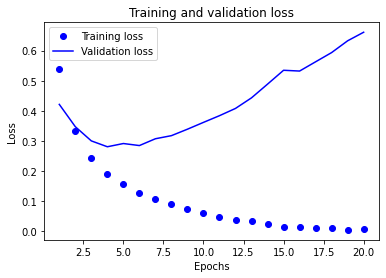

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # 'bo' stands for 'blue dot'
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss') # 'b' stands for 'solid blue line'
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

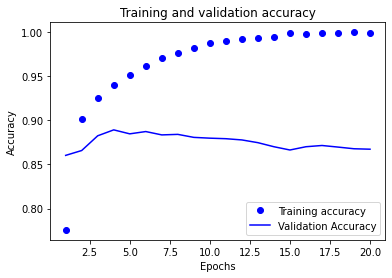

In [19]:
plt.clf() # clf == 'C''L'ears the 'F'igure

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label = 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

After 4th epoch, the `validation loss` started to increase and `validation accuracy` started to decrease. On the other hand, `training loss` started to decrease and `training accuracy` started to increase. In fact, the model fit well to training data, leading to what is called an overfitting.

Let's create a new model from scratch with 4 epochs to evalute before overfitting.

In [20]:
x_test.shape

(25000, 10000)

In [21]:
model = models.Sequential()
model.add(layers.Dense(units = 16, activation = 'relu', input_shape = (10000,) )) # 10,000 == 10,000 attributes from x_test
model.add(layers.Dense(units = 16, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid')) # output layer

# loss, optimizer, metrics
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# fitting data
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.4394 - accuracy: 0.8264
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2540 - accuracy: 0.9113
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1985 - accuracy: 0.9307
Epoch 4/4
49/49 [==============================] - 1s 31ms/step - loss: 0.1663 - accuracy: 0.9427


In [22]:
# evaluating
results = model.evaluate(x_test, y_test)

print('Results: {}'.format(results))

782/782 [==============================] - 2s 3ms/step - loss: 0.3187 - accuracy: 0.8743
Results: [0.31867995858192444, 0.8743199706077576]


#### Using a trained model to predict new data

In [24]:
model.predict(x_test, verbose = 1)

# Result is an array of reviews' probability being positive

782/782 [==============================] - 2s 2ms/step


array([[0.14792481],
       [0.99984694],
       [0.7334161 ],
       ...,
       [0.08617541],
       [0.04506937],
       [0.5132157 ]], dtype=float32)

#### Wrapping up 

* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it as tensors into a neural network. 

* Sequences of words can be encoded as binary vectors, but there are other encoding options, too.

* Stacks of Dense layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.

* In a binary classification problem (two output classes), your network should end with a Dense layer with one unit and a `sigmoid` activation: the output of your network should be a scalar between 0 and 1, encoding a probability.

* With such a scalar `sigmoid` output on a binary classification problem, the loss function you should use is `binary_crossentropy`.

* The `rmsprop` optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

<div align = 'center'>

## Single-label multiclass classification

</div>

In [25]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [26]:
train_data[:2] # Array of lists where each list has integers/indexes of words

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])],
      dtype=object)

In [27]:
# Decoding back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [38]:
# preparing the data using the same function defined early
print("Training data shape before preparing: ", train_data.shape)
print("Testing data shape before preparing: ", test_data.shape)

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("Training data shape after preparing: ", x_train.shape)
print("Testing data shape after preparing: ", x_test.shape)

Training data shape before preparing:  (8982,)
Testing data shape before preparing:  (2246,)
Training data shape after preparing:  (8982, 10000)
Testing data shape after preparing:  (2246, 10000)


In [40]:
# Showing the two first entries (rows) 
x_train[0:2]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [47]:
# The function commented below is just a example how labels could be encoded using
# a not built-in function

# def to_one_hot(labels, dimension = 46):
# 	results = np.zeros((len(labels), dimension))
# 	for i, label in enumerate(labels):
# 		results[i, label] = 1.
# 	return results
	
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

print("Training labels: ", np.unique(train_labels)) # 46-classes
print("Test labels: ", np.unique(test_labels)) # 46-classes

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Training labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Test labels:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [48]:
one_hot_train_labels[:2]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [49]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

In [50]:
# Setting apart some data to validate
x_valid = x_train[:1000]
y_valid = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

In [51]:
# Training for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_valid, y_valid) )

Epoch 1/20
16/16 [==============================] - 2s 70ms/step - loss: 2.5114 - accuracy: 0.5520 - val_loss: 1.6770 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 55ms/step - loss: 1.3811 - accuracy: 0.7174 - val_loss: 1.2762 - val_accuracy: 0.7350
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0302 - accuracy: 0.7849 - val_loss: 1.1509 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 54ms/step - loss: 0.8138 - accuracy: 0.8247 - val_loss: 1.0213 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 62ms/step - loss: 0.6469 - accuracy: 0.8657 - val_loss: 0.9471 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 1s 67ms/step - loss: 0.5168 - accuracy: 0.8925 - val_loss: 0.9223 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 65ms/step - loss: 0.4162 - accuracy: 0.9146 - val_loss: 0.9185 - val_accuracy: 0.8090
Epoch 8/20
16

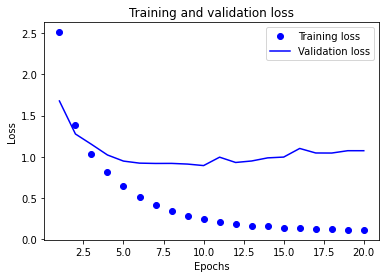

In [52]:
# pltting

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


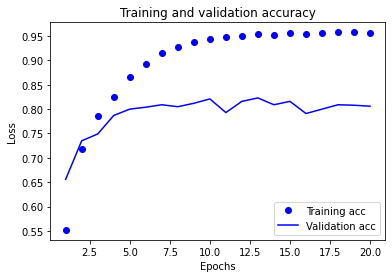

In [54]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
# The network starts to overfitting after 10 epochs, so let's construct a new from scratch and traind until 10 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (x_train.shape[1],)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer='rmsprop',
			  loss='categorical_crossentropy',
			  metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs = 10,
          batch_size = 512,
          validation_data = (x_valid, y_valid) )

Epoch 1/10
16/16 [==============================] - 2s 73ms/step - loss: 2.5136 - accuracy: 0.5172 - val_loss: 1.6929 - val_accuracy: 0.6270
Epoch 2/10
16/16 [==============================] - 1s 54ms/step - loss: 1.4331 - accuracy: 0.6942 - val_loss: 1.3178 - val_accuracy: 0.6970
Epoch 3/10
16/16 [==============================] - 1s 49ms/step - loss: 1.0770 - accuracy: 0.7677 - val_loss: 1.1400 - val_accuracy: 0.7680
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.8489 - accuracy: 0.8211 - val_loss: 1.0649 - val_accuracy: 0.7600
Epoch 5/10
16/16 [==============================] - 1s 54ms/step - loss: 0.6737 - accuracy: 0.8572 - val_loss: 0.9730 - val_accuracy: 0.7970
Epoch 6/10
16/16 [==============================] - 1s 52ms/step - loss: 0.5372 - accuracy: 0.8891 - val_loss: 0.9282 - val_accuracy: 0.8110
Epoch 7/10
16/16 [==============================] - 1s 53ms/step - loss: 0.4323 - accuracy: 0.9100 - val_loss: 0.9452 - val_accuracy: 0.8030
Epoch 8/10
16

In [58]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 6ms/step - loss: 0.9893 - accuracy: 0.7881


In [59]:
# generating predictions
predictions = model.predict(x_test)

In [65]:
predictions.shape

(2246, 46)

In [63]:
# The class with the highest probability
np.argmax(predictions[0])

3

In [66]:
# Original class
one_hot_test_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Wrapping up 

* If you’re trying to classify data points among N classes, your network should end with a Dense layer of size N.

* In a single-label, multiclass classification problem, your network should end with a `softmax` activation so that it will output a probability distribution over the N output classes.

* Categorical crossentropy (`categorical_crossentropy`) is almost always the loss function you should use for such problems. It minimizes the distance between the probability distributions output by the network and the true distribution of the targets.

* There are two ways to handle labels in multiclass classification:
 1. Encoding the labels via categorical encoding (also known as one-hot encoding) and using `categorical_crossentropy` as a loss function;
 2. Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function;

* If you need to classify data into a large number of categories, you should avoid creating information bottlenecks in your network due to intermediate layers that are too small.